<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0624/blob/main/4_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/ximen0624/raw/main/titanic/train.csv"
req.urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen0624/raw/main/titanic/test.csv"
req.urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7d394d4a5c00>)

In [2]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


欄位分別
1. 類別: 固定幾種的(Pclass, Name, Sex, Cabin, Embarked)
2. 數值: 連續型(Age, SibSp, Parch, Ticket#,Fare)

資料預處理
1. 填缺失值: 最可能
a. 類別: 最常出現的那種
b. 數值: 中位數

2. One-Hot Encoding: 把類別資料變成數個是非題


In [4]:
datas = pd.concat([train, test], axis=0)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 語法教學
# Everything is an object: 任何東西都具有型態, 每個型態具有其獨特的操作
# 型態: dict 操作: [key]
# 功能也是如此 型態: int  操作: (4.2)
b = int
b(8.6)
def test(mode):
  if mode is True:
    return int
  else:
    return round
test(False)(10000.6)

10001

In [6]:
# apply: 轉換
def func(a):
  return (a ** 2) * 10

s = pd.Series([1, 2, 3, 4])
s.apply(func)

0     10
1     40
2     90
3    160
dtype: int64

In [7]:
# "Braund, Mr. Owen Harris".split(".")[0].split(",")[-1].strip()
def func(s):
  return (s.split(".")[0]
       .split(",")[-1]
       .strip())
datas["Name"] = datas["Name"].apply(func)

In [8]:
def func(s):
  if pd.isna(s):
    return s
  else:
    return s[0]
datas["Cabin"] = datas["Cabin"].apply(func)

In [9]:
counts = datas["Ticket"].value_counts()
def func(t):
  if pd.isna(t):
    return t
  else:
    return counts[t]
datas["Ticket"] = datas["Ticket"].apply(func)

In [10]:
s = datas.isna().sum()
# 篩選 Series[跟你Series比數依樣多的True/False]
fil = s > 0
s[fil]

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [11]:
# 類別型: 捕最常出現的
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [12]:
# 數執行: 中位數
# 過濾出數值欄位
s = datas.dtypes
fil = s != "object"
num_index = s[fil].drop("Pclass").index
med = datas[num_index].median()
datas = datas.fillna(med)

In [13]:
s = datas.isna().sum()
# 篩選 Series[跟你Series比數依樣多的True/False]
fil = s > 0
s[fil]

Cabin    1014
dtype: int64

One-Hot:

Name: 會篩選掉出現率比較少的(為了美觀)

Sex: 不做One-hot可以, 二值型, 你可直接變成0/1

Cabin: 使用 000 來當作不知道(順便補缺失)

Pclass: 神奇! 雖然他是類別型的欄位, 但這類別說她有大小關係又沒問題, 所以你可以選擇做也可以選擇不做, 但我都試過了, 做會正確率高一點

In [14]:
reserved = datas["Name"].value_counts().index[:4]
def func(n):
  if n in reserved:
    return n
  else:
    return None
datas["Name"] = datas["Name"].apply(func)

In [15]:
import pandas as pd
pd.set_option('display.max_columns', 500)
datas = pd.get_dummies(datas)
# 特別針對pclass做one-hot
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,38.0,1,0,2,71.2833,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,26.0,0,0,1,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,35.0,1,0,2,53.1000,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
4,35.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
414,39.0,0,0,3,108.9000,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
415,38.5,0,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
416,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [16]:
# Step3. 這個其實是最後才做的
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,1
1,38.0,1,0,2,71.2833,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,1
2,26.0,0,0,1,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
3,35.0,1,0,2,53.1000,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,1
4,35.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
414,39.0,0,0,3,108.9000,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,0
415,38.5,0,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
416,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scaled = pd.DataFrame(scaler.fit_transform(datas),
               columns=datas.columns)
datas_scaled

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Demo: pandas取列
d = pd.DataFrame([
    ["a", "b"],
    ["c", "d"],
    ["e", "f"]
], index=[0, 0, 1])
# loc: 是看列標籤取列 iloc: 是看第幾列取列!!!
d.iloc[2]

0    e
1    f
Name: 1, dtype: object

In [19]:
x = datas[:len(train)]
x_predict = datas[len(train):]
x_scaled = datas_scaled[:len(train)]
x_predict_scaled = datas_scaled[len(train):]
y = train["Survived"]

In [20]:
# 之前我們是把x->x_train(90)和x_test(10)
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

for n in range(2, 30):
  clf = KNeighborsClassifier(n_neighbors=n)
  scores = cross_val_score(clf, x_scaled, y, cv=10)
  avg = np.average(scores)
  print(n, ":", avg)

2 : 0.7901747815230962
3 : 0.8193757802746566
4 : 0.8058801498127341
5 : 0.8170786516853932
6 : 0.8227091136079899
7 : 0.832796504369538
8 : 0.8136828963795256
9 : 0.8125842696629213
10 : 0.8058676654182271
11 : 0.818214731585518
12 : 0.8069787765293384
13 : 0.8137203495630463
14 : 0.8125842696629213
15 : 0.8227215980024967
16 : 0.8137203495630463
17 : 0.8193508114856429
18 : 0.8137203495630461
19 : 0.8137203495630463
20 : 0.8170536828963794
21 : 0.8136953807740325
22 : 0.8148064918851435
23 : 0.8148064918851435
24 : 0.8147940074906368
25 : 0.8136828963795256
26 : 0.8091885143570536
27 : 0.8058676654182273
28 : 0.8069538077403247
29 : 0.8058426966292135


In [21]:
# test這名字我上面再demo的時候不小心蓋掉了
test = pd.read_csv("test.csv", encoding="utf-8")
# 其實上面做出的7就可以, 但如果為了準確率只能靠賽
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)
result = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
result.to_csv("titanic_knn.csv", encoding="utf-8", index=False)

In [22]:
# 改用GridSearchCV來自動幫你搜索
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2, 30)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_scaled, y)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# clf = DecisionTreeClassifier()
clf = RandomForestClassifier()
params = {
    "max_depth":range(2, 8),
    "n_estimators":range(21, 40, 2)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)
print(cv.best_score_)
print(cv.best_params_)

0.8429213483146067
{'max_depth': 7, 'n_estimators': 39}


In [27]:
# 你做完GridSearch可以直接拿
clf = cv.best_estimator_

[Text(0.5, 0.875, 'Name_Mr <= 0.5\ngini = 0.483\nsamples = 561\nvalue = [527, 364]\nclass = Victim'),
 Text(0.25, 0.625, 'Family <= 3.5\ngini = 0.405\nsamples = 252\nvalue = [112, 285]\nclass = Survivor'),
 Text(0.125, 0.375, 'Pclass_3 <= 0.5\ngini = 0.324\nsamples = 220\nvalue = [71, 278]\nclass = Survivor'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 14.0\ngini = 0.249\nsamples = 32\nvalue = [41, 7]\nclass = Victim'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pclass_1 <= 0.5\ngini = 0.269\nsamples = 309\nvalue = [415, 79]\nclass = Victim'),
 Text(0.625, 0.375, 'Cabin_E <= 0.5\ngini = 0.209\nsamples = 250\nvalue = [350, 47]\nclass = Victim'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Ticket <= 1.5\ngini = 0.442\nsamples = 59\nvalue = [65, 32]\nclass = Victim'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375

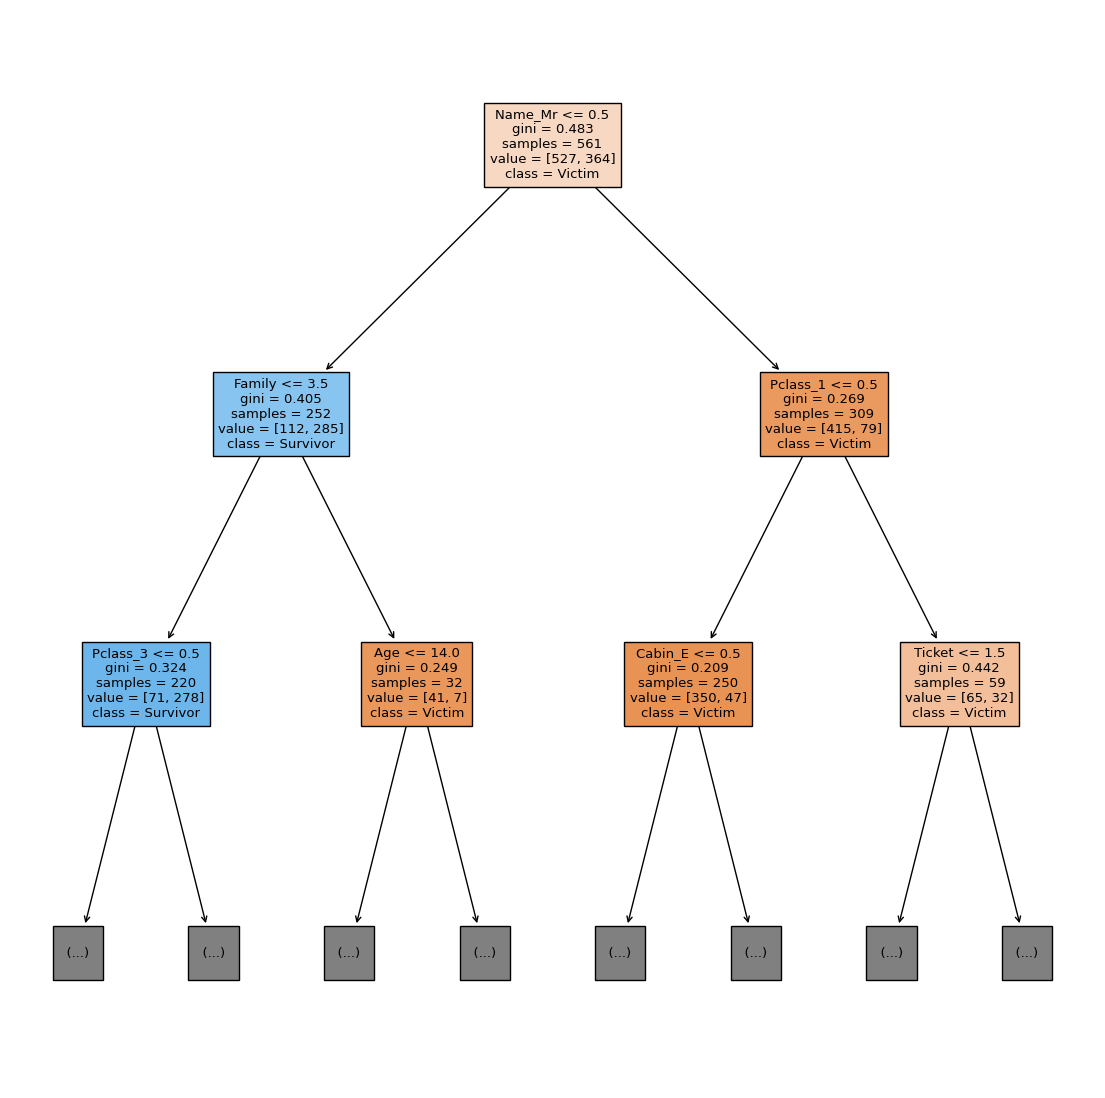

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[14, 14])
# estimators_裡存放著他的每一個決策數
plot_tree(clf.estimators_[2],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [34]:
imp = clf.feature_importances_
pd.Series(imp, index=x.columns).sort_values(ascending=False)

Name_Mr        0.192266
Sex_female     0.109263
Fare           0.101524
Sex_male       0.101499
Age            0.073010
Ticket         0.069254
Pclass_3       0.061456
Name_Mrs       0.059295
Family         0.040496
SibSp          0.038034
Pclass_1       0.028768
Name_Miss      0.019431
Pclass_2       0.014884
Parch          0.014630
Cabin_E        0.012438
Name_Master    0.011934
Embarked_S     0.011334
Embarked_C     0.011117
Cabin_C        0.008037
Embarked_Q     0.007356
Cabin_D        0.005539
Cabin_B        0.004826
Cabin_A        0.002014
Cabin_G        0.001430
Cabin_F        0.000149
Cabin_T        0.000014
dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

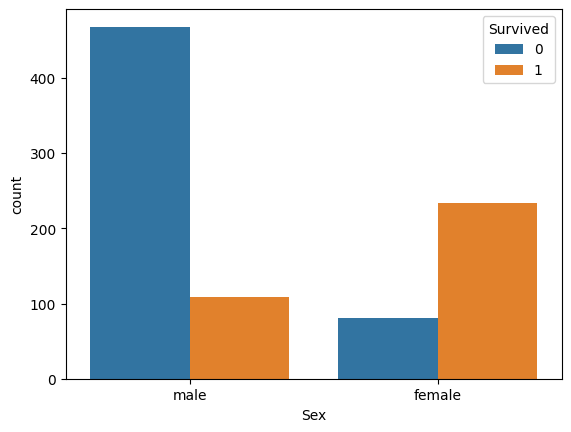

In [38]:
import seaborn as sns
# seaborn hue參數: 多增加一個特徵
sns.countplot(x=train["Sex"], hue=train["Survived"])

In [45]:
# fil = (train["Sex"] == "male") & (train["Survived"] == 1)
# train[fil].describe()

軸: axis

軸的標籤: label

圖示: legend

刻度: ticks

標題: title

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(0.34, 8.378]'),
  Text(1, 0, '(8.378, 16.336]'),
  Text(2, 0, '(16.336, 24.294]'),
  Text(3, 0, '(24.294, 32.252]'),
  Text(4, 0, '(32.252, 40.21]'),
  Text(5, 0, '(40.21, 48.168]'),
  Text(6, 0, '(48.168, 56.126]'),
  Text(7, 0, '(56.126, 64.084]'),
  Text(8, 0, '(64.084, 72.042]'),
  Text(9, 0, '(72.042, 80.0]')])

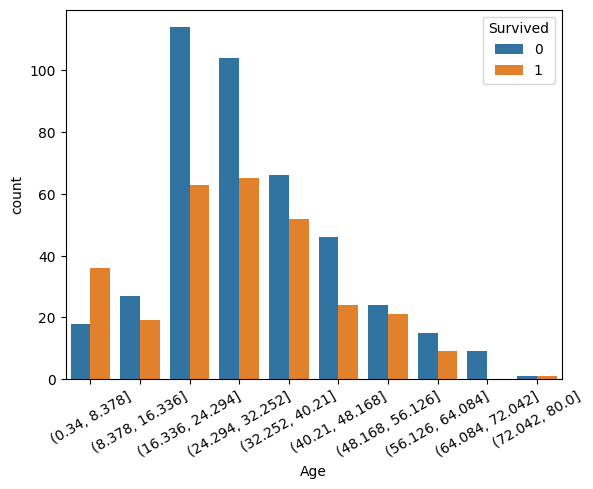

In [48]:
c = pd.cut(train["Age"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=30)

In [50]:
# fil = (train["Age"] <= 1) & (train["Survived"] == 0)
# train[fil]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(-0.512, 51.233]'),
  Text(1, 0, '(51.233, 102.466]'),
  Text(2, 0, '(102.466, 153.699]'),
  Text(3, 0, '(153.699, 204.932]'),
  Text(4, 0, '(204.932, 256.165]'),
  Text(5, 0, '(256.165, 307.398]'),
  Text(6, 0, '(307.398, 358.63]'),
  Text(7, 0, '(358.63, 409.863]'),
  Text(8, 0, '(409.863, 461.096]'),
  Text(9, 0, '(461.096, 512.329]')])

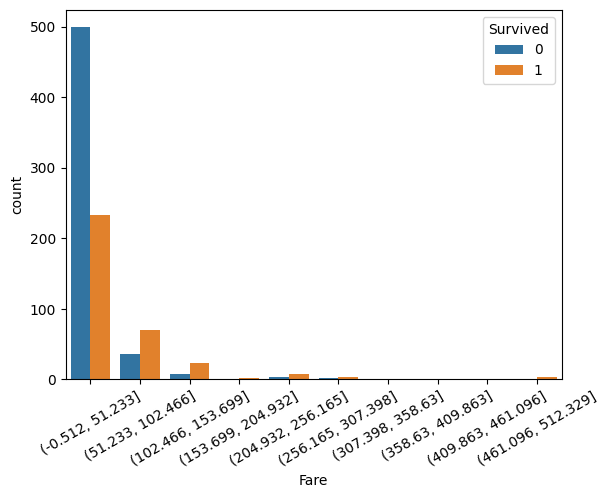

In [52]:
c = pd.cut(train["Fare"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=30)